In [3]:
import warnings
warnings.filterwarnings('ignore')

[*********************100%***********************]  1 of 1 completed


C:\Users\Caíque Miranda\AppData\Local\Temp\ipykernel_14676\3970455359.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][i] = 1  # Sinal de compra
C:\Users\Caíque Miranda\AppData\Local\Temp\ipykernel_14676\3970455359.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][i] = -1  # Sinal de venda


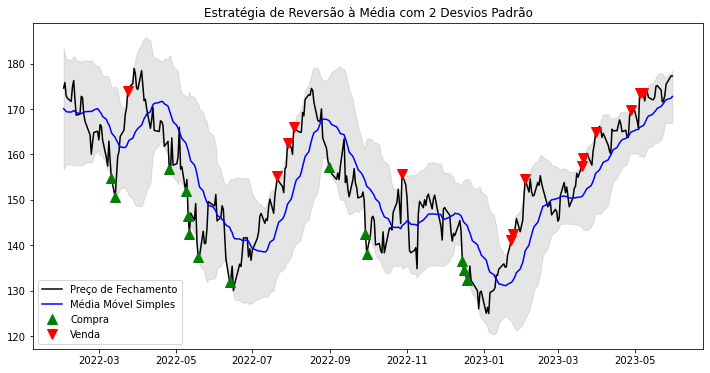

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def download_historical_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def calculate_moving_average(data, window):
    return data['Close'].rolling(window=window).mean()

def calculate_standard_deviation(data, window):
    return data['Close'].rolling(window=window).std()

def trading_strategy(data, ma_window, num_std):
    data['SMA'] = calculate_moving_average(data, ma_window)
    data['Upper_Band'] = data['SMA'] + (data['Close'].rolling(window=ma_window).std() * num_std)
    data['Lower_Band'] = data['SMA'] - (data['Close'].rolling(window=ma_window).std() * num_std)
    data['Signal'] = 0

    for i in range(ma_window, len(data)):
        if data['Close'][i] > data['Upper_Band'][i]:
            data['Signal'][i] = -1  # Sinal de venda
        elif data['Close'][i] < data['Lower_Band'][i]:
            data['Signal'][i] = 1  # Sinal de compra

    data.dropna(inplace=True)
    return data

def plot_trading_signals(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Preço de Fechamento', color='black')
    plt.plot(data.index, data['SMA'], label='Média Móvel Simples', color='blue')
    plt.fill_between(data.index, data['Upper_Band'], data['Lower_Band'], alpha=0.2, color='gray')
    plt.plot(data[data['Signal'] == 1].index, data['Close'][data['Signal'] == 1], '^', markersize=10, color='g', label='Compra')
    plt.plot(data[data['Signal'] == -1].index, data['Close'][data['Signal'] == -1], 'v', markersize=10, color='r', label='Venda')
    plt.title('Estratégia de Reversão à Média com 2 Desvios Padrão')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    ticker_symbol = 'AAPL'  # Substitua 'AAPL' pelo ticker do ativo financeiro desejado
    start_date = '2022-01-01'  # Defina a data de início do histórico de dados
    end_date = '2023-06-01'  # Defina a data de término do histórico de dados
    moving_average_window = 21  # Janela da média móvel (20 dias neste exemplo)
    num_standard_deviations = 2  # Número de desvios padrão para a banda superior e inferior

    # Baixar dados históricos do Yahoo Finance
    data = download_historical_data(ticker_symbol, start_date, end_date)

    # Aplicar a estratégia de trading
    data_with_signals = trading_strategy(data, moving_average_window, num_standard_deviations)

    # Plotar os sinais de compra e venda
    plot_trading_signals(data_with_signals)

[*********************100%***********************]  1 of 1 completed


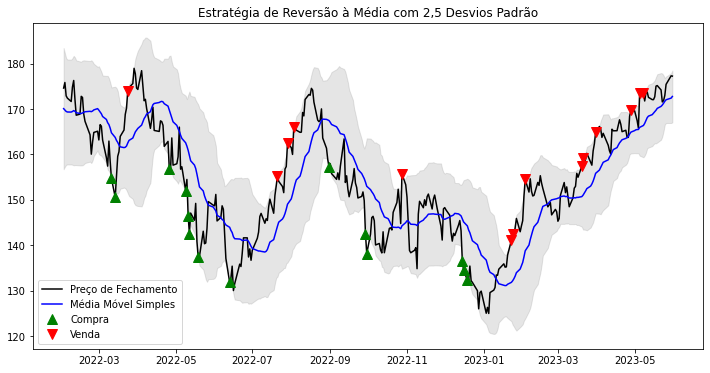

Drawdown Máximo: 30.14%


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def download_historical_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def calculate_moving_average(data, window):
    return data['Close'].rolling(window=window).mean()

def calculate_standard_deviation(data, window):
    return data['Close'].rolling(window=window).std()

def trading_strategy(data, ma_window, num_std):
    data['SMA'] = calculate_moving_average(data, ma_window)
    data['Upper_Band'] = data['SMA'] + (data['Close'].rolling(window=ma_window).std() * num_std)
    data['Lower_Band'] = data['SMA'] - (data['Close'].rolling(window=ma_window).std() * num_std)
    data['Signal'] = 0

    for i in range(ma_window, len(data)):
        if data['Close'][i] > data['Upper_Band'][i]:
            data['Signal'][i] = -1  # Sinal de venda
        elif data['Close'][i] < data['Lower_Band'][i]:
            data['Signal'][i] = 1  # Sinal de compra

    data.dropna(inplace=True)
    return data

def calculate_drawdown(data):
    data['Peak'] = data['Close'].cummax()
    data['Drawdown'] = (data['Peak'] - data['Close']) / data['Peak']
    return data['Drawdown'].max()

def plot_trading_signals(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Preço de Fechamento', color='black')
    plt.plot(data.index, data['SMA'], label='Média Móvel Simples', color='blue')
    plt.fill_between(data.index, data['Upper_Band'], data['Lower_Band'], alpha=0.2, color='gray')
    plt.plot(data[data['Signal'] == 1].index, data['Close'][data['Signal'] == 1], '^', markersize=10, color='g', label='Compra')
    plt.plot(data[data['Signal'] == -1].index, data['Close'][data['Signal'] == -1], 'v', markersize=10, color='r', label='Venda')
    plt.title('Estratégia de Reversão à Média com 2,5 Desvios Padrão')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    ticker_symbol = 'AAPL'  # Substitua 'AAPL' pelo ticker do ativo financeiro desejado
    start_date = '2022-01-01'  # Defina a data de início do histórico de dados
    end_date = '2023-06-01'  # Defina a data de término do histórico de dados
    moving_average_window = 21  # Janela da média móvel (20 dias neste exemplo)
    num_standard_deviations = 2  # Número de desvios padrão para a banda superior e inferior

    # Baixar dados históricos do Yahoo Finance
    data = download_historical_data(ticker_symbol, start_date, end_date)

    # Aplicar a estratégia de trading
    data_with_signals = trading_strategy(data, moving_average_window, num_standard_deviations)

    # Calcular o drawdown máximo
    max_drawdown = calculate_drawdown(data_with_signals)

    # Plotar os sinais de compra e venda
    plot_trading_signals(data_with_signals)

    # Imprimir o drawdown máximo
    print("Drawdown Máximo: {:.2%}".format(max_drawdown))

[*********************100%***********************]  1 of 1 completed


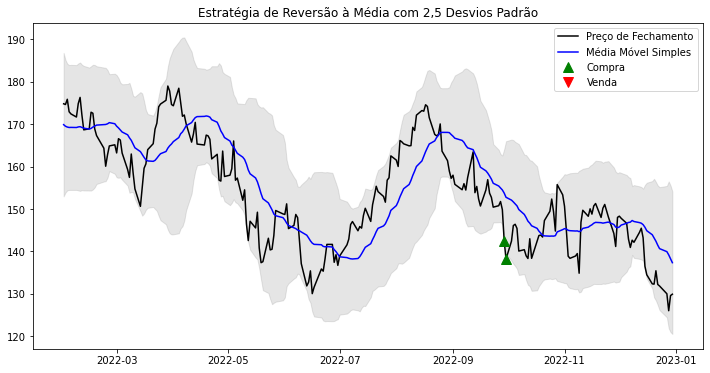

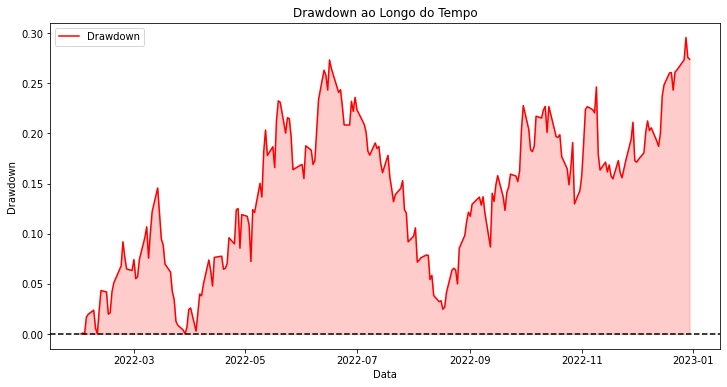

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def download_historical_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def calculate_moving_average(data, window):
    return data['Close'].rolling(window=window).mean()

def calculate_standard_deviation(data, window):
    return data['Close'].rolling(window=window).std()

def trading_strategy(data, ma_window, num_std):
    data['SMA'] = calculate_moving_average(data, ma_window)
    data['Upper_Band'] = data['SMA'] + (data['Close'].rolling(window=ma_window).std() * num_std)
    data['Lower_Band'] = data['SMA'] - (data['Close'].rolling(window=ma_window).std() * num_std)
    data['Signal'] = 0

    for i in range(ma_window, len(data)):
        if data['Close'][i] > data['Upper_Band'][i]:
            data['Signal'][i] = -1  # Sinal de venda
        elif data['Close'][i] < data['Lower_Band'][i]:
            data['Signal'][i] = 1  # Sinal de compra

    data.dropna(inplace=True)
    return data

def calculate_drawdown(data):
    data['Peak'] = data['Close'].cummax()
    data['Drawdown'] = (data['Peak'] - data['Close']) / data['Peak']
    return data['Drawdown']

def plot_trading_signals(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Preço de Fechamento', color='black')
    plt.plot(data.index, data['SMA'], label='Média Móvel Simples', color='blue')
    plt.fill_between(data.index, data['Upper_Band'], data['Lower_Band'], alpha=0.2, color='gray')
    plt.plot(data[data['Signal'] == 1].index, data['Close'][data['Signal'] == 1], '^', markersize=10, color='g', label='Compra')
    plt.plot(data[data['Signal'] == -1].index, data['Close'][data['Signal'] == -1], 'v', markersize=10, color='r', label='Venda')
    plt.title('Estratégia de Reversão à Média com 2,5 Desvios Padrão')
    plt.legend()
    plt.show()

def plot_drawdown(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Drawdown'], label='Drawdown', color='red')
    plt.fill_between(data.index, data['Drawdown'], alpha=0.2, color='red')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title('Drawdown ao Longo do Tempo')
    plt.xlabel('Data')
    plt.ylabel('Drawdown')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    ticker_symbol = 'AAPL'  # Substitua 'AAPL' pelo ticker do ativo financeiro desejado
    start_date = '2022-01-01'  # Defina a data de início do histórico de dados
    end_date = '2023-06-01'  # Defina a data de término do histórico de dados
    moving_average_window = 21  # Janela da média móvel (20 dias neste exemplo)
    num_standard_deviations = 2  # Número de desvios padrão para a banda superior e inferior

    # Baixar dados históricos do Yahoo Finance
    data = download_historical_data(ticker_symbol, start_date, end_date)

    # Aplicar a estratégia de trading
    data_with_signals = trading_strategy(data, moving_average_window, num_standard_deviations)

    # Calcular o drawdown
    data_with_signals['Drawdown'] = calculate_drawdown(data_with_signals)

    # Plotar os sinais de compra e venda
    plot_trading_signals(data_with_signals)

    # Plotar o drawdown ao longo do tempo
    plot_drawdown(data_with_signals)